In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [13]:
import pandas as pd

amazon_ratings = pd.read_csv('../data/train.csv')
amazon_ratings = amazon_ratings.dropna()

amazon_ratings.head()

,user_id,item_id,rating,timestamp
0,0,7314,5.0,1353612262000
1,0,15493,5.0,1370653034000
2,0,18817,4.0,1373668644000
3,0,18251,4.0,1373669469000
4,0,16199,1.0,1375136041000


In [14]:
amazon_ratings.info()

amazon_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543146 entries, 0 to 2543145
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int64  
 1   item_id    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 77.6 MB


,user_id,item_id,rating,timestamp
count,2.543146e+06,2.543146e+06,2.543146e+06,2.543146e+06
mean,4.338789e+05,2.840569e+04,4.038812e+00,1.467106e+12
std,2.509318e+05,1.796797e+04,1.365664e+00,8.242910e+10
min,0.000000e+00,0.000000e+00,1.000000e+00,9.565885e+11
25%,2.163772e+05,1.345100e+04,3.000000e+00,1.407054e+12
50%,4.337430e+05,2.493100e+04,5.000000e+00,1.453042e+12
75%,6.512078e+05,4.029700e+04,5.000000e+00,1.523213e+12
max,8.682170e+05,7.783200e+04,5.000000e+00,1.694398e+12


In [15]:
amazon_ratings.shape

(2543146, 4)

In [19]:
popular_products = pd.DataFrame(amazon_ratings.groupby('item_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
item_id,
20832,28303
12595,22787
12372,16378
6864,15428
33154,14792
13451,13007
7030,12306
24931,12188
18550,11628


<Axes: xlabel='item_id'>

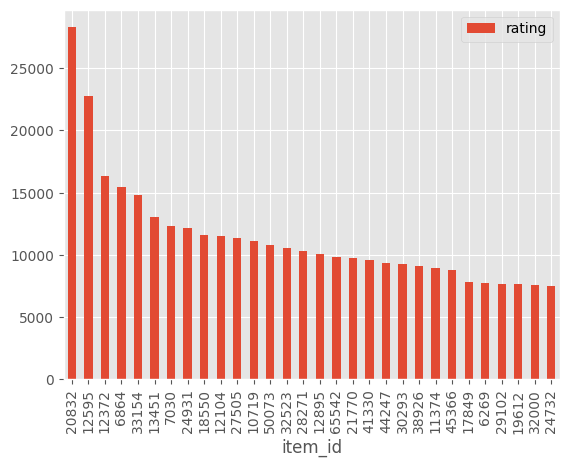

In [20]:
most_popular.head(30).plot(kind = "bar")

# Part 2

In [54]:
amazon_ratings1 = amazon_ratings.head(10000)

In [55]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='rating', index='user_id', columns='item_id', fill_value=0)
ratings_utility_matrix.head()

item_id,39,58,64,104,224,314,448,540,608,668,...,77678,77706,77718,77730,77761,77767,77775,77789,77821,77825
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ratings_utility_matrix.shape

(3347, 4069)

In [26]:
X = ratings_utility_matrix.T
X.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346
item_id,,,,,,,,,,,,,,,,,,,,,
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X.shape

(4069, 3347)

In [51]:
X1 = X

In [29]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(4069, 10)

In [30]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4069, 4069)

In [39]:
X.index[99]

np.int64(3703)

In [48]:
i=3703

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [49]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(4069,)

In [56]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[676, 2350, 4167, 4532, 5642, 6149, 11323, 11366, 13975]

In [69]:
# Part 3: User-Based Recommendation Function
# This function combines Part 1 (popularity-based) and Part 2 (collaborative filtering)
# to provide personalized recommendations for a given user ID

def get_user_recommendations(user_id, num_recommendations=10):
    """
    Recommend top products for a given user ID based on their purchase history
    and collaborative filtering techniques.
    
    Parameters:
    user_id (str): The user ID for whom to generate recommendations
    num_recommendations (int): Number of recommendations to return (default: 10)
    
    Returns:
    list: Top recommended product IDs
    """
    
    # Check if user exists in the dataset
    if user_id not in ratings_utility_matrix.index:
        print(f"User {user_id} not found. Returning popular products for new users...")
        # Fall back to popularity-based recommendations (Part 1)
        return most_popular.head(num_recommendations).index.tolist()
    
    # Get user's purchase history
    user_ratings = ratings_utility_matrix.loc[user_id]
    purchased_products = user_ratings[user_ratings > 0].index.tolist()
    
    if len(purchased_products) == 0:
        print(f"User {user_id} has no purchase history. Returning popular products...")
        return most_popular.head(num_recommendations).index.tolist()
    
    print(f"User {user_id} has purchased {len(purchased_products)} products.")
    print(f"Sample purchased products: {purchased_products[:3]}")
    
    # Get recommendations based on collaborative filtering (Part 2)
    recommendation_scores = {}
    
    for product in purchased_products:
        if product in X.index:
            # Find the index of the product in correlation matrix
            product_idx = list(X.index).index(product)
            
            # Get correlations for this product
            product_correlations = correlation_matrix[product_idx]
            
            # Add scores for correlated products
            for i, correlation in enumerate(product_correlations):
                recommended_product = X.index[i]
                
                # Skip products already purchased
                if recommended_product not in purchased_products:
                    if recommended_product not in recommendation_scores:
                        recommendation_scores[recommended_product] = 0
                    recommendation_scores[recommended_product] += correlation
    
    # Sort recommendations by score
    sorted_recommendations = sorted(recommendation_scores.items(), 
                                  key=lambda x: x[1], 
                                  reverse=True)
    
    # Extract top recommendations
    top_recommendations = [product for product, score in sorted_recommendations[:num_recommendations]]
    
    # If we don't have enough recommendations, fill with popular products
    if len(top_recommendations) < num_recommendations:
        popular_products_list = most_popular.index.tolist()
        for product in popular_products_list:
            if product not in top_recommendations and product not in purchased_products:
                top_recommendations.append(product)
                if len(top_recommendations) >= num_recommendations:
                    break
    
    return top_recommendations[:num_recommendations]

# Enhanced function with detailed analysis
def get_detailed_user_recommendations(user_id, num_recommendations=10):
    """
    Get detailed recommendations with analysis for a given user ID.
    
    Parameters:
    user_id (str): The user ID for whom to generate recommendations
    num_recommendations (int): Number of recommendations to return (default: 10)
    
    Returns:
    dict: Dictionary containing recommendations and analysis
    """
    
    result = {
        'user_id': user_id,
        'recommendations': [],
        'user_profile': {},
        'recommendation_method': ''
    }
    
    # Check if user exists
    if user_id not in ratings_utility_matrix.index:
        result['recommendation_method'] = 'popularity_based'
        result['recommendations'] = most_popular.head(num_recommendations).index.tolist()
        result['user_profile'] = {'status': 'new_user', 'purchase_count': 0}
        return result
    
    # Analyze user profile
    user_ratings = ratings_utility_matrix.loc[user_id]
    purchased_products = user_ratings[user_ratings > 0]
    
    result['user_profile'] = {
        'status': 'existing_user',
        'purchase_count': len(purchased_products),
        'average_rating': purchased_products.mean(),
        'purchased_products': purchased_products.index.tolist()
    }
    
    if len(purchased_products) == 0:
        result['recommendation_method'] = 'popularity_based'
        result['recommendations'] = most_popular.head(num_recommendations).index.tolist()
        return result
    
    # Collaborative filtering recommendations
    result['recommendation_method'] = 'collaborative_filtering'
    result['recommendations'] = get_user_recommendations(user_id, num_recommendations)
    
    return result

# Example usage function
def demonstrate_recommendations():
    """
    Demonstrate the recommendation system with sample users
    """
    # Get a few sample user IDs from the dataset
    sample_users = ratings_utility_matrix.index[:5].tolist()
    
    print("=== Product Recommendation System Demo ===\n")
    
    for user_id in sample_users:
        print(f"Recommendations for User: {user_id}")
        print("-" * 50)
        
        recommendations = get_detailed_user_recommendations(user_id)
        
        print(f"User Status: {recommendations['user_profile']['status']}")
        print(f"Purchase Count: {recommendations['user_profile']['purchase_count']}")
        print(f"Recommendation Method: {recommendations['recommendation_method']}")
        print(f"Top 10 Recommendations: {recommendations['recommendations']}")
        print("\n")

In [61]:
get_user_recommendations(3)

User 3 has purchased 8 products.
Sample purchased products: [19746, 27832, 28206]


[np.int64(26760),
 np.int64(50260),
 np.int64(21500),
 np.int64(34399),
 np.int64(40178),
 np.int64(24931),
 np.int64(19116),
 np.int64(47768),
 np.int64(32076),
 np.int64(41408)]

In [68]:
test_users = pd.read_csv('../data/test.csv')
# fill predictions with results of get_user_recommendations(3)

predictions = []

for user_id in test_users:
    predictions.append(get_user_recommendations(user_id))

submission = pd.DataFrame({'user_id': test_users, 'predictions': predictions})
submission.to_csv("submission.csv", index=False)
print(f"Submission saved: {submission.shape[0]:,} predictions")


User user_id not found. Returning popular products for new users...
User predictions not found. Returning popular products for new users...


ValueError: Data must be 1-dimensional, got ndarray of shape (412461, 2) instead

In [62]:
submission = pd.read_csv('../data/test.csv')

print(f"Submission saved: {submission.shape[0]:,} predictions")

FileNotFoundError: [Errno 2] No such file or directory: '../data/submission.csv'